<a href="https://colab.research.google.com/github/shrestha-bikash/K-Means-Clustering/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_clusters(data_points, centroids):
    clusters = {}
    for index in range(k):
        clusters[str(index)] = []


    for point in data_points:
        d = [l2_norm(point, center) for center in centroids]
        cluster_index = np.argmin(d)
        # print(cluster_index)
        clusters[str(cluster_index)].append(point)
        # print(clusters)
    
    return clusters

In [3]:
def calculate_new_centroids(clusters):                        
    centroids = [np.mean(clusters[item], axis=0) for item in clusters]

    return centroids

In [4]:
def l2_norm(p1, p2):
    return np.linalg.norm(p1 - p2)

def l1_norm(p1, p2):
    return np.linalg.norm((p1 - p2), ord=1)

In [5]:
def calc_intra_sq_dist(clusters, centroids):
    for i, center in enumerate(centroids):
        intra_sq_dist = np.sum([np.square(l2_norm(point, center)) for point in clusters[str(i)]])
        print('intra_sq_dist for cluster', i+1, ':', intra_sq_dist)

def calc_intra_dist(clusters, centroids):
    for i, center in enumerate(centroids):
        intra_dist = np.sum([l1_norm(point, center) for point in clusters[str(i)]])
        print('intra_dist for cluster', i+1, ':', intra_dist)

def plot_clusters(clusters, centroids, title='Showing Cluster'):
    np.random.seed(10) # for generating same rgb values for colormap
    for key, center in zip(clusters, centroids):
        color = np.random.rand(1,3)
        data = np.array(clusters[key])
        x_c, y_c = data[:, 0], data[:, 1]
        plt.scatter(x_c, y_c, c=color, marker='o', label='Cluster'+key)
        plt.scatter(center[0], center[1], c=color, marker='x', label='Centroid'+key)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

In [13]:
def generate_data_points(N=50, seed=42):
    np.random.seed(seed)
    data_points = np.random.uniform(1,100, (N, 2))

    return data_points

In [16]:
def fit_k_means_clustering(data_points, k, seed=42):
    np.random.seed(seed)

    count = 100

    centroids = np.random.uniform(1,100, (k, 2))
    temp = np.zeros((k, 2)) # act as a placeholder for previous centorids to compare with new centroids
    print('starting centroids:', centroids)

    while((not np.allclose(centroids, temp)) or (count < 0)):
        temp = centroids
        clusters = generate_clusters(data_points, centroids)
        centroids = calculate_new_centroids(clusters)

        # calc_intra_sq_dist(clusters, centroids)
        # calc_intra_dist(clusters, centroids)

        # print('succesive centroids:', centroids)
        count -= 1

    print('Iterations:', 100-count)
    # print('Centroids:', centroids)
    # print(clusters)

    plot_clusters(clusters, centroids, f'Showing Clusters with seed: {seed}')

    return centroids

In [22]:
def predict_cluster(test_points, centroids):
    cluster_index = []
    for point in test_points:
        d = [l2_norm(point, center) for center in centroids]
        cluster_index.append(np.argmin(d))
    
    return cluster_index

starting centroids: [[55.52899235 71.10663444]
 [29.79956915 51.57193291]
 [89.40174848 89.7330158 ]
 [13.43294574 21.51704494]]
Iterations: 8


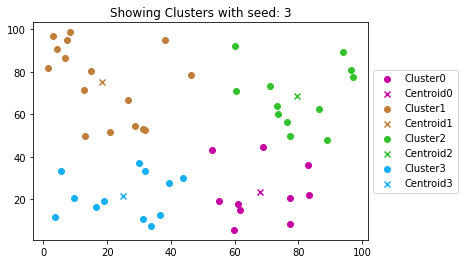

starting centroids: [[77.36074368  3.05444299]
 [63.73117526 75.13158437]
 [50.35219422 23.25486791]
 [20.60822361 76.29254051]]
Iterations: 6


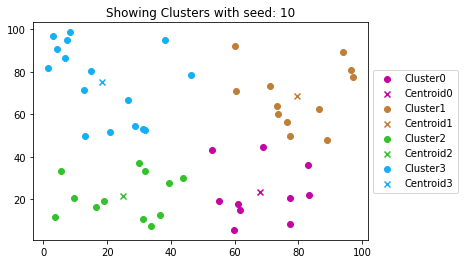

starting centroids: [[96.04171303 70.25169295]
 [99.98686197 22.78666268]
 [36.74457904 74.24425803]
 [99.64911678 32.3183508 ]]
Iterations: 9


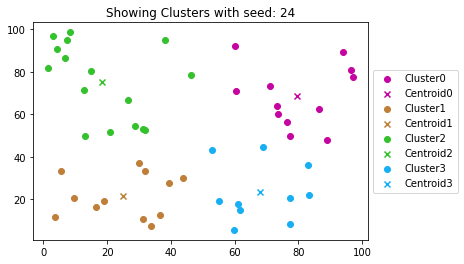

starting centroids: [[25.60250262 45.54756668]
 [41.6831395  26.7696694 ]
 [87.16917315 19.31895279]
 [ 2.94648112 95.37195112]]
Iterations: 5


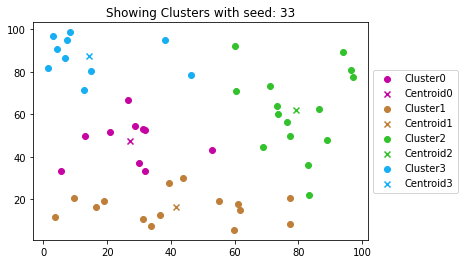

starting centroids: [[38.07947177 95.12071633]
 [73.46740024 60.26718994]
 [16.4458454  16.44345751]
 [ 6.7502776  86.75143843]]
Iterations: 11


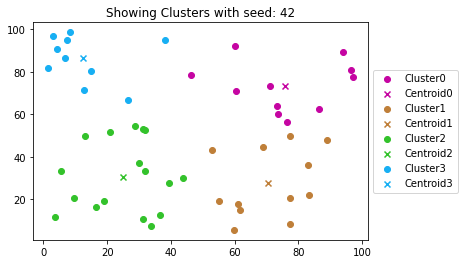

starting centroids: [[67.89741013  5.42650604]
 [34.98706358 64.75795297]
 [29.13708688 94.98444286]
 [16.60934671 39.40932328]]
Iterations: 4


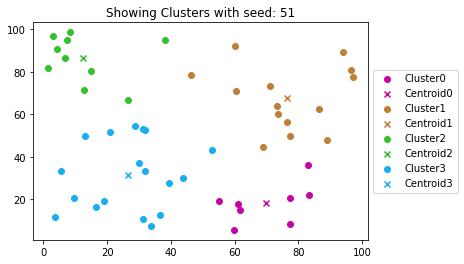

starting centroids: [[10.21772038 97.19393608]
 [48.90213807 25.00974745]
 [53.58125915 29.26887931]
 [86.40040733  5.06891519]]
Iterations: 4


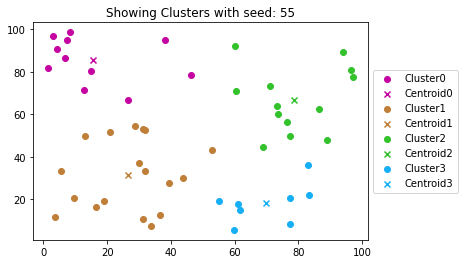

starting centroids: [[11.56708202 68.74992069]
 [53.96129912 37.5495206 ]
 [41.84884973 59.19690013]
 [71.89130504 18.16006984]]
Iterations: 5


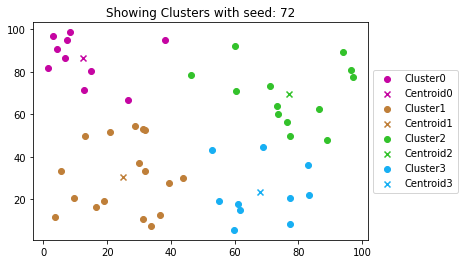

starting centroids: [[36.18649266 34.74403879]
 [93.37753779 91.46809938]
 [83.90900811  6.88931851]
 [25.57281229 51.402825  ]]
Iterations: 4


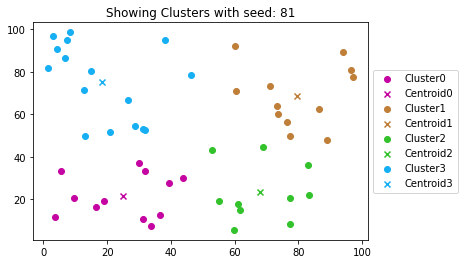

starting centroids: [[67.5555773  49.31976152]
 [82.72402223  4.11319238]
 [80.99694637 56.99612454]
 [30.46462737  5.62287633]]
Iterations: 5


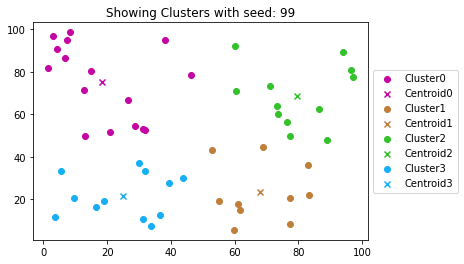

In [19]:
k = 4 # number of clusters
data_points = generate_data_points(50, 42) # randomly generating 2D data points 

# different seed values to generate different random centroids for multiple runs
seeds = [3, 10, 24, 33, 42, 51, 55, 72, 81, 99]

for seed in seeds:
    centroids = fit_k_means_clustering(data_points, k, seed)

In [23]:
test_points = generate_data_points(10, 47)
print('Test Points:')
print(test_points)

prediction = predict_cluster(test_points, centroids)

print('Predicted Clusters', prediction)

Test Points:
[[12.23535872 97.47382635]
 [73.14472872 35.79531278]
 [71.05290869 80.16085556]
 [64.9106236  42.04536111]
 [70.89707012 25.4182888 ]
 [26.3432507   3.37712406]
 [10.77386953 30.7432071 ]
 [64.4447121  32.89858686]
 [19.36391967 91.80216135]
 [27.82115953 28.08124127]]
Predicted Clusters [0, 1, 2, 1, 1, 3, 3, 1, 0, 3]
